In [10]:
import numpy as np
import matplotlib as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os

import utilities

In [4]:
import urllib

json_local = os.path.join('data', 'sarcasm', 'sarcasm.json')
json_url = json_url = 'https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json'

if not os.path.exists(json_local):
    urllib.request.urlretrieve(json_url, json_local)

In [5]:
import json

with open(json_local, 'r') as file:
    sarcasm = json.load(file)

In [9]:
trn_size = 20000
st, lb = [], []

for item in sarcasm:
    st.append(item['headline'])
    lb.append(item['is_sarcastic'])
    
lb = np.array(lb)    

trn_st, val_st = st[:trn_size], st[trn_size:]
trn_lb, val_lb = lb[:trn_size], lb[trn_size:]

In [11]:
vocab_size = 10000

tokenizer = Tokenizer(vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(trn_st)

trn_sq = tokenizer.texts_to_sequences(trn_st)
val_sq = tokenizer.texts_to_sequences(val_st)

trn_sq = pad_sequences(trn_sq, padding='post')
val_sq = pad_sequences(val_sq, padding='post')

In [45]:
def fit_sarcasm(embed_d=16, nn='ave', hidden_d=16, filnum=128, filwid=5, epochs=10, batch=128):
    if nn == 'ave':
        layers = [keras.layers.GlobalAveragePooling1D()]
    elif nn == 'lstm':
        layers = [keras.layers.Bidirectional(keras.layers.LSTM(hidden_d))]
    elif nn == 'gru':
        layers = [keras.layers.Bidirectional(keras.layers.GRU(hidden_d))]
    elif nn == 'conv':
        layers = [
            keras.layers.Conv1D(filnum, filwid, activation='relu'),
            keras.layers.GlobalMaxPooling1D(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(16, activation='relu')
        ]
    else:
        raise Exception('Invalid nn option: ' + str(nn))
        
    model = keras.models.Sequential(
        [keras.layers.Embedding(vocab_size, embed_d)]
        + layers
        + [keras.layers.Dense(1, activation='sigmoid')]
    )
    model.summary()
    
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    
    history = model.fit(
        trn_sq, trn_lb, batch_size=batch,
        epochs=epochs,
        validation_data=(val_sq, val_lb),
        callbacks=[keras.callbacks.EarlyStopping('val_loss', patience=3)]
    )
    
    utilities.plot_train_val_metrics(history, ['loss', 'accuracy'])
    
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 1)           10000     
                                                                 
 global_average_pooling1d_2   (None, 1)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10,002
Trainable params: 10,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
157/157 [==============================] - 1s 6ms/step - loss: 0.6887 - accuracy: 0.5405 - val_loss: 0.6831 - val_accuracy: 0.5633
Epoch 2/300
157/157 [==============================] - 1s 5ms/step - loss: 0.6808 - accuracy: 0.5603 - va

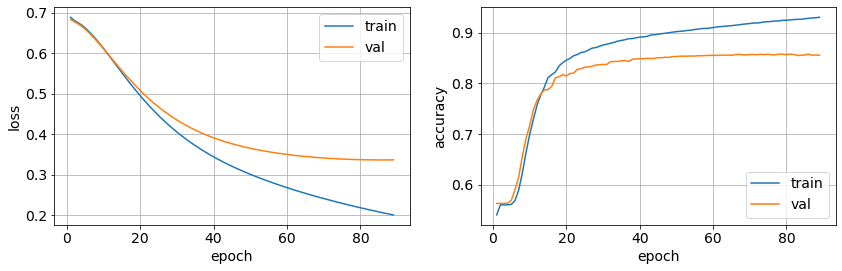

In [18]:
%%time
fit_sarcasm(embed_d=1, nn='ave', epochs=300)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 1)           10000     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               2304      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,337
Trainable params: 12,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
157/157 [==============================] - 5s 14ms/step - loss: 0.6731 - accuracy: 0.5714 - val_loss: 0.6287 - val_accuracy: 0.7380
Epoch 2/300
157/157 [==============================] - 1s 8ms/step - loss: 0.4964 - accuracy: 0.7792 - v

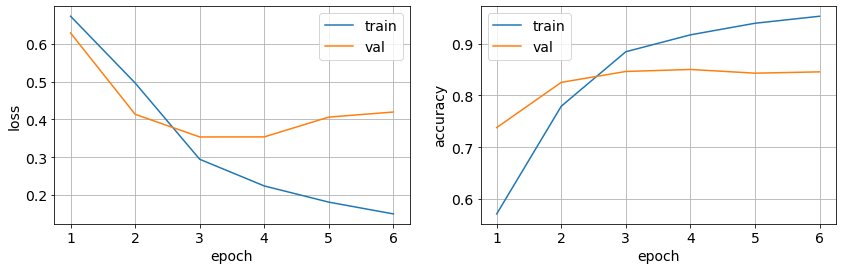

In [19]:
%%time
fit_sarcasm(embed_d=1, nn='lstm', epochs=300)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 164,257
Trainable params: 164,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
157/157 [==============================] - 4s 15ms/step - loss: 0.5821 - accuracy: 0.6707 - val_loss: 0.4081 - val_accuracy: 0.8298
Epoch 2/300
157/157 [==============================] - 1s 8ms/step - loss: 0.2973 - accuracy: 0.8791 -

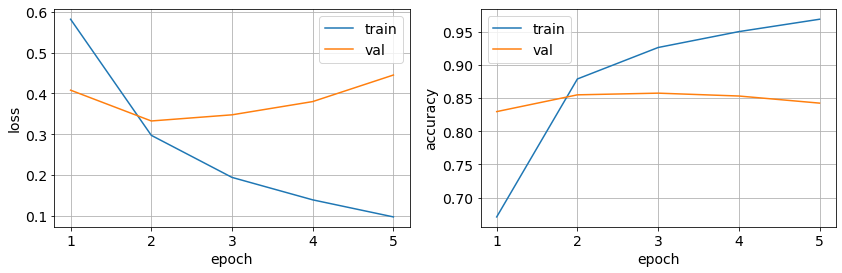

In [20]:
%%time
fit_sarcasm(embed_d=16, nn='lstm', epochs=300)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               3264      
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 163,297
Trainable params: 163,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
157/157 [==============================] - 4s 13ms/step - loss: 0.5606 - accuracy: 0.6815 - val_loss: 0.3798 - val_accuracy: 0.8438
Epoch 2/300
157/157 [==============================] - 1s 8ms/step - loss: 0.2859 - accuracy: 0.8832 -

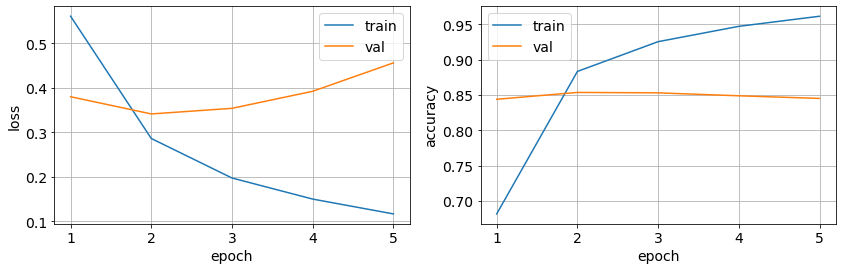

In [21]:
%%time
fit_sarcasm(embed_d=16, nn='gru', epochs=300)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 1)           10000     
                                                                 
 conv1d_14 (Conv1D)          (None, None, 128)         768       
                                                                 
 global_max_pooling1d_12 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 16)                2064      
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                     

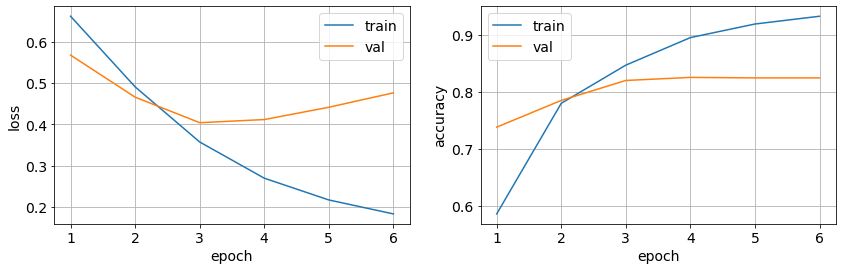

In [46]:
%%time
fit_sarcasm(embed_d=1, nn='conv', epochs=300)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, None, 16)          160000    
                                                                 
 conv1d_15 (Conv1D)          (None, None, 128)         10368     
                                                                 
 global_max_pooling1d_13 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 16)                2064      
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                     

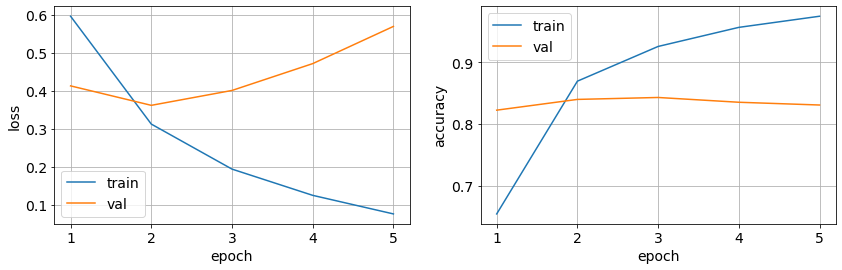

In [47]:
%%time
fit_sarcasm(embed_d=16, nn='conv', epochs=300)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 64)          640000    
                                                                 
 conv1d_16 (Conv1D)          (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_14 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 16)                2064      
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                     

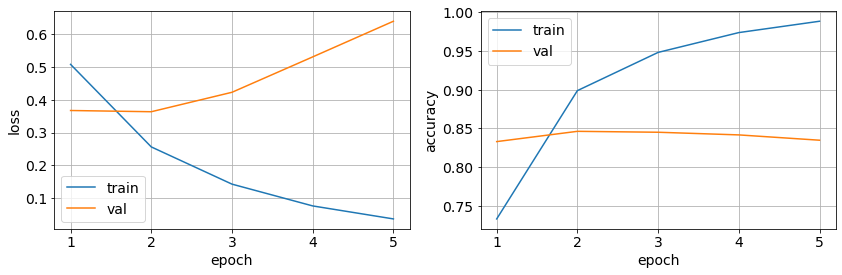

In [48]:
%%time
fit_sarcasm(embed_d=64, nn='conv', epochs=300)